### Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Measure scaling

Text(0, 0.5, 'Error rate (irred. = 0.01)')

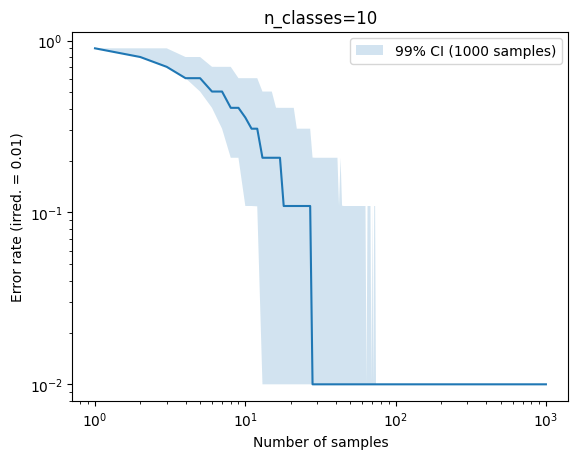

In [7]:
n_trials = 1000
n_classes = 10
irred_err = 0.01

acc_scaling = []
for n in range(1, 1000):
    samples = np.random.multinomial(
        n, [1 / n_classes] * n_classes, size=n_trials
    )
    accs = (samples > 0).mean(axis=1)

    acc_scaling.append(accs)

acc_scaling = np.array(acc_scaling) * (1 - irred_err)
err_scaling = (1 - acc_scaling)

err_lo = np.quantile(err_scaling, 0.005, axis=1)
err_mid = np.quantile(err_scaling, 0.5, axis=1)
err_hi = np.quantile(err_scaling, 0.995, axis=1)

# Plot with error bars as shaded region
plt.plot(np.array(range(1, len(err_mid) + 1)), err_mid)
plt.fill_between(
    range(1, len(err_mid) + 1),
    err_lo,
    err_hi,
    alpha=0.2,
    label="99% CI (1000 samples)"
)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.title(f"{n_classes=}")

plt.xlabel("Number of samples")
plt.ylabel(f"Error rate (irred. = {irred_err})")
